<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Submission-dates-around-financial-year-end" data-toc-modified-id="Submission-dates-around-financial-year-end-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Submission dates around financial year end</a></span></li><li><span><a href="#Distribution-of-claims-by-value" data-toc-modified-id="Distribution-of-claims-by-value-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Distribution of claims by value</a></span><ul class="toc-item"><li><span><a href="#Staffing-costs" data-toc-modified-id="Staffing-costs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Staffing costs</a></span></li></ul></li><li><span><a href="#Biggest-and-smallest-claimers" data-toc-modified-id="Biggest-and-smallest-claimers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Biggest and smallest claimers</a></span><ul class="toc-item"><li><span><a href="#Biggest-and-smallest-claimers---average-by-financial-year" data-toc-modified-id="Biggest-and-smallest-claimers---average-by-financial-year-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Biggest and smallest claimers - average by financial year</a></span><ul class="toc-item"><li><span><a href="#Bar-plot" data-toc-modified-id="Bar-plot-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Bar plot</a></span></li></ul></li></ul></li></ul></div>

# Exploring the features in the dataset

In this notebook we'll have a dig around the features and perhaps see what feature engineering can be done.

From this point on we'll work with the Pickle file created in [006 DC2 - Data Cleaning - joining tables](006%20DC2%20-%20Data%20Cleaning%20-%20joining%20tables.ipynb)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import sqlite3
import pickle

# set retina display -- makes plots look much better.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [8]:
DATA_DIR = '/Users/brad/Code/DS-ML-AI/MP_expenses/data/'
PICKLE_FILE = f'{DATA_DIR}expenses.pickle'
MP_PICKLE_FILE = f'{DATA_DIR}mps.pickle'
PARTY_COLOURS_FILE = f'{DATA_DIR}party_colours.pickle'
# print floats with a thousands separator and 2 decimal places.
pd.options.display.float_format = '{:,.2f}'.format


In [3]:
all_data = pd.read_pickle(PICKLE_FILE)

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445964 entries, 0 to 1445963
Data columns (total 29 columns):
year                  1445964 non-null object
date                  1445964 non-null datetime64[ns]
claim_no              1442619 non-null object
mps_name              1445964 non-null object
mps_constituency      1445964 non-null object
category              1445964 non-null object
expense_type          1445964 non-null object
short_description     997774 non-null object
details               1000280 non-null object
journey_type          773432 non-null object
from                  318972 non-null object
to                    318966 non-null object
travel                238640 non-null object
nights                773432 non-null float64
mileage               773432 non-null float64
amount_claimed        1445964 non-null float64
amount_paid           1445964 non-null float64
amount_not_paid       1445964 non-null float64
amount_repaid         1445964 non-null float64
status

## Submission dates around financial year end

Note that these are the dates the expenses were submitted, not the dates they were incurred,. Note that there is a large concentration around the end of March/beginning of April, which is the financial year end.

In [5]:
all_data['date'].value_counts()

2016-01-04    3332
2017-01-04    3108
2011-03-31    2159
2014-03-31    2155
2016-03-31    1871
2017-03-31    1681
2014-01-04    1556
2011-01-04    1546
2013-12-19    1381
2014-09-26    1272
2015-03-31    1253
2013-06-24    1232
2013-01-07    1208
2015-03-26    1196
2015-06-07    1195
2014-10-27    1179
2015-01-06    1176
2016-11-25    1174
2011-01-12    1167
2010-01-11    1160
2013-11-03    1158
2012-03-31    1157
2013-03-18    1146
2014-01-12    1140
2013-11-25    1133
2012-10-19    1129
2014-03-27    1128
2014-01-24    1121
2015-01-04    1120
2012-11-23    1086
              ... 
2017-05-20      45
2016-12-24      44
2017-12-24      44
2015-04-26      44
2015-03-05      43
2017-05-14      43
2016-12-26      43
2014-12-25      43
2017-05-21      42
2015-12-04      41
2017-12-26      40
2011-12-26      36
2018-03-17      36
2017-05-28      36
2012-12-25      35
2018-03-27      34
2013-12-25      34
2010-12-25      32
2010-12-26      31
2016-12-25      31
2010-12-27      30
2017-03-06  

The below plot shows that expenses seem to all be submitted around a quarter into the year, as this must be the finanical year cut-off. 

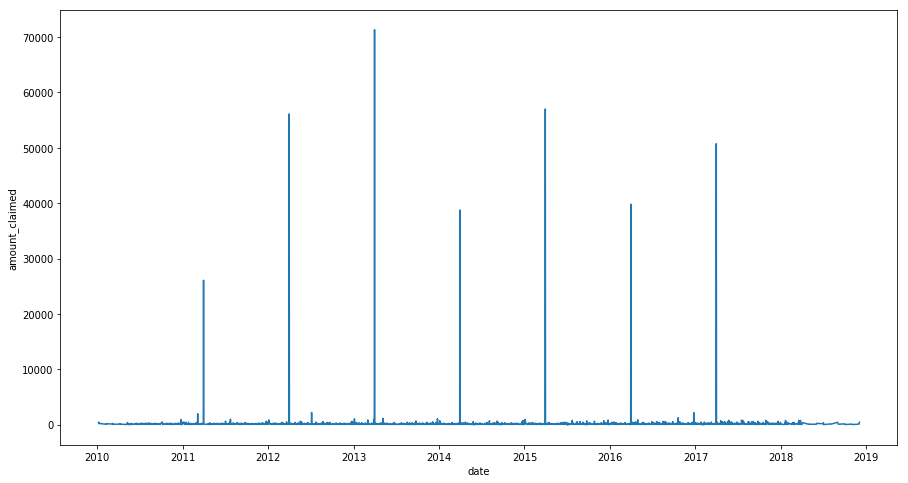

In [6]:
plt.figure(figsize=(15,8))

sns.lineplot(data=all_data.sample(100000), x='date', y='amount_claimed', ci=None);

## Distribution of claims by value

Lets plot the distribution of expense claim values.

/Users/brad/.virtualenvs/MP_expenses-1OVSslJM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


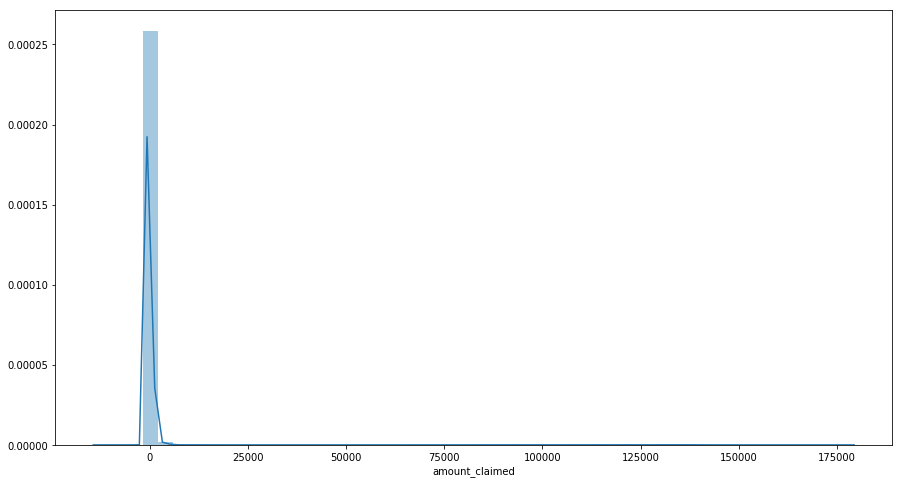

In [7]:
plt.figure(figsize=(15,8))

sns.distplot(all_data['amount_claimed']);

Wow. There are some extremely large outliers... Let's check it out.

### Staffing costs

In [118]:
all_data[['mps_name', 'date', 'party', 'expense_type', 'short_description', 'amount_claimed']]\
    .sort_values(by=['amount_claimed'], ascending=False).head(30)

mps_name                 date  \
1105835    Khalid Mahmood  2017-03-31 00:00:00   
925953       Chuka Umunna  2014-03-31 00:00:00   
927643       Tessa Jowell  2014-03-31 00:00:00   
191658       Chuka Umunna  2015-03-31 00:00:00   
1105236       Dawn Butler  2017-03-31 00:00:00   
371132        Jim Shannon  2016-03-31 00:00:00   
926080      David Ruffley  2014-03-31 00:00:00   
926293     Glenda Jackson  2014-03-31 00:00:00   
370438       Bob Blackman  2016-03-31 00:00:00   
370778    Fabian Hamilton  2016-03-31 00:00:00   
192516     Sandra Osborne  2015-03-31 00:00:00   
192066        Jim Shannon  2015-03-31 00:00:00   
1105866        Lisa Nandy  2017-03-31 00:00:00   
572515        Jim Shannon  2013-03-31 00:00:00   
192418         Paul Flynn  2015-03-31 00:00:00   
572370     Glenda Jackson  2013-03-31 00:00:00   
370427        Ben Wallace  2016-03-31 00:00:00   
371168         John Cryer  2016-03-31 00:00:00   
572183       Chuka Umunna  2013-03-31 00:00:00   
927450      Roger Godsiff  2014-03-31 00:00:00   
1105126      Clive Efford  2017-03-31 00:00:00   
925769   Andrew Slaughter  2014-03-31 00:00:00   
370559       Chuka Umunna  2016-03-31 00:00:00   
192544      Stella Creasy  2015-03-31 00:00:00   
192495      Roger Godsiff  2015-03-31 00:00:00   
191827      Gareth Thomas  2015-03-31 00:00:00   
192237   Margaret Ritchie  2015-03-31 00:00:00   
1105773        Karen Buck  2017-03-31 00:00:00   
1254638       David Lammy  2011-03-31 00:00:00   
191911     Gregory Barker  2015-03-31 00:00:00   

                                      party expense_type  \
1105835                              Labour      Payroll   
925953                               Labour      Payroll   
927643                               Labour      Payroll   
191658                               Labour      Payroll   
1105236                              Labour      Payroll   
371132                                  DUP      Payroll   
926080                         Conservative      Payroll   
926293                               Labour      Payroll   
370438                         Conservative      Payroll   
370778                               Labour      Payroll   
192516                               Labour      Payroll   
192066                                  DUP      Payroll   
1105866                              Labour      Payroll   
572515                                  DUP      Payroll   
192418                               Labour      Payroll   
572370                               Labour      Payroll   
370427                         Conservative      Payroll   
371168                               Labour      Payroll   
572183                               Labour      Payroll   
927450                               Labour      Payroll   
1105126                              Labour      Payroll   
925769                               Labour      Payroll   
370559                               Labour      Payroll   
192544                  Labour/Co-operative      Payroll   
192495                               Labour      Payroll   
191827                  Labour/Co-operative      Payroll   
192237   Social Democratic and Labour Party      Payroll   
1105773                              Labour      Payroll   
1254638                              Labour      Payroll   
191911                         Conservative      Payroll   

                                         short_description  amount_claimed  
1105835  Total Staffing budget payroll costs for the 20...      178,261.77  
925953            Total payroll costs for the 2013-14 year      173,937.76  
927643            Total payroll costs for the 2013-14 year      170,739.52  
191658            Total payroll costs for the 2014-15 year      169,469.94  
1105236  Total Staffing budget payroll costs for the 20...      168,308.27  
371132            Total payroll costs for the 2015-16 year      166,378.78  
926080            Total payroll costs for the 2013-14 year      16

Ok. So some MPs claim a whole year's worth of payroll in one hit... Lets look into the Payroll abit more.

In [35]:
payroll_claims = all_data[all_data['expense_type'] == 'Payroll']

/Users/brad/.virtualenvs/MP_expenses-1OVSslJM/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


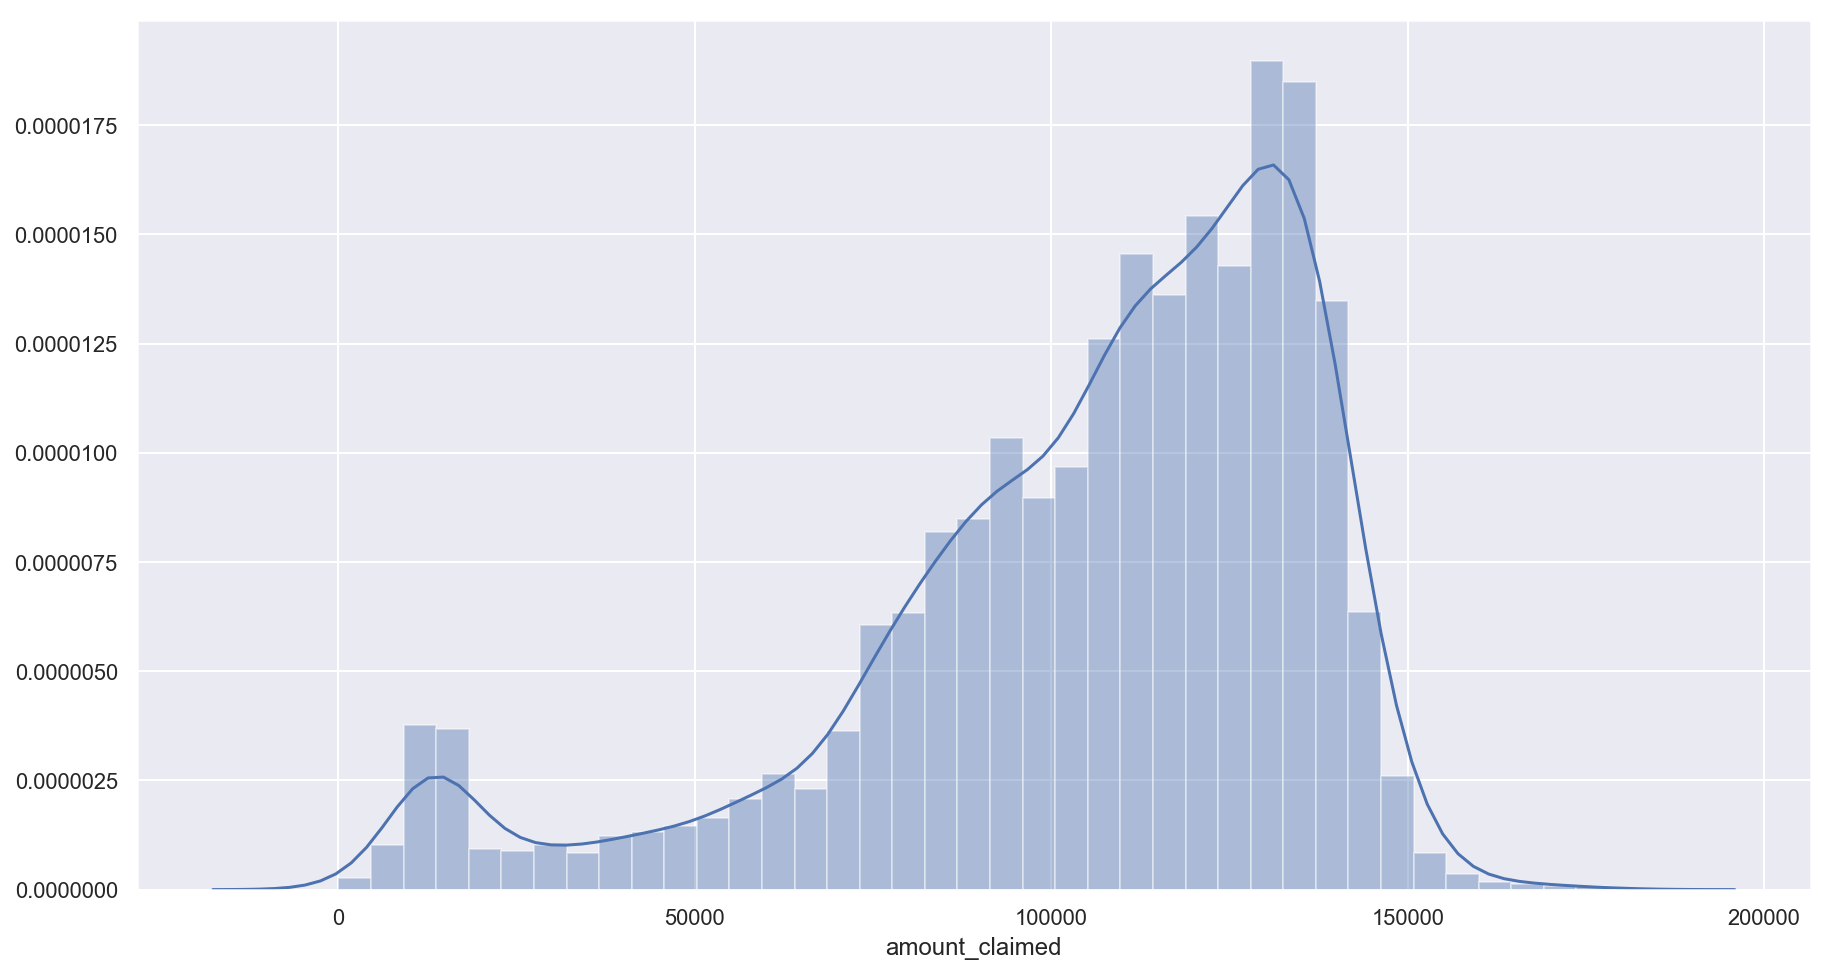

In [36]:
plt.figure(figsize=(15,8))

sns.distplot(payroll_claims['amount_claimed']);

In [76]:
payroll_claims['amount_claimed'].mean()

105473.95366336635

So the average payroll claim is ~£105k, but we're not sure if every claim is annualised, so we need to not presume this to be an annual number. Something to look into later....

## Biggest and smallest claimers

So who are the biggest and smallest claimers over the entire period?

In [5]:
all_data.groupby(['mps_name'])\
    .sum()[['amount_claimed', 'amount_paid', 'amount_not_paid', 'amount_repaid']]\
    .sort_values('amount_claimed', ascending=False)

amount_claimed  amount_paid  amount_not_paid  \
mps_name                                                               
Jim Shannon               1,533,342.91 1,530,879.28         2,463.62   
Ian Paisley               1,467,211.07 1,464,583.78         2,627.29   
Alistair Carmichael       1,434,146.09 1,434,017.14           128.95   
Simon Danczuk             1,355,829.29 1,350,899.17         4,450.09   
John Healey               1,345,286.34 1,344,850.49           435.85   
David Mundell             1,340,512.64 1,340,457.64            55.00   
Ben Wallace               1,335,623.05 1,335,623.05             0.00   
Angus MacNeil             1,321,384.96 1,318,053.80         3,331.16   
Sharon Hodgson            1,318,052.02 1,317,739.69           120.38   
Lindsay Hoyle             1,316,016.17 1,313,925.94         2,090.23   
Paul Maynard              1,310,011.75 1,309,989.25            22.50   
Bill Esterson             1,302,573.23 1,302,511.28            61.95   
Jeffrey Donaldson         1,301,721.13 1,301,561.13           160.00   
Luciana Berger            1,300,878.41 1,300,770.72           107.69   
Liam Byrne                1,300,575.98 1,299,942.87           680.60   
Lisa Nandy                1,298,896.00 1,298,895.96             0.00   
Ian Liddell-Grainger      1,297,066.76 1,296,144.15           922.61   
Ian Lavery                1,296,869.72 1,296,008.53           861.19   
Ian Murray                1,295,813.47 1,295,772.97            40.50   
Margaret Ritchie          1,291,921.83 1,291,330.95           590.88   
Ivan Lewis                1,283,109.71 1,282,124.46           985.25   
Jonathan Reynolds         1,281,034.28 1,280,876.85           157.43   
Stewart Hosie             1,279,495.39 1,279,283.89           211.50   
David Morris              1,267,294.29 1,256,332.03        10,962.26   
Jamie Reed                1,266,524.54 1,266,313.44           211.10   
Nicholas Dakin            1,266,491.91 1,266,491.91             0.00   
Clive Betts               1,265,930.22 1,265,835.24            94.98   
Yvonne Fovargue           1,263,675.35 1,263,622.90            52.45   
Tim Farron                1,261,746.68 1,261,671.68            75.00   
Daniel Kawczynski         1,259,515.98 1,259,487.63            28.35   
...                                ...          ...              ...   
Kemi Badenoch                33,678.83    33,678.83             0.00   
Lesley Laird                 33,640.77    33,640.77             0.00   
Fiona Onasanya               33,245.80    33,245.80             0.00   
Bill Grant                   33,144.97    33,144.97             0.00   
Sarah Jones                  32,751.27    32,751.27             0.00   
Sandy Martin                 32,162.64    32,162.64             0.00   
Luke Pollard                 31,956.79    31,956.79             0.00   
David Drew                   30,823.51    30,823.51             0.00   
Paul Sweeney                 30,388.86    30,388.86             0.00   
Sarah Olney                  29,765.20    29,765.20             0.00   
Jared O'Mara                 29,595.94    29,595.94             0.00   
Matt Rodda                   27,575.73    27,575.73             0.00   
Neil O'Brien                 26,401.87    26,401.87             0.00   
Mohammad Yasin               26,221.40    26,221.40             0.00   
Dan Carden                   26,207.97    26,207.97             0.00   
Ben Lake                     25,697.32    25,697.32             0.00   
Tanmanjeet Singh Dhesi       24,825.10    24,825.10             0.00   
Anneliese Dodds              23,333.17    23,305.92            27.25   
Emma Dent Coad               23,205.85    22,921.85           284.00   
Ellie Reeves                 22,385.94    22,385.94             0.00   
Gillian Keegan               20,936.27    20,936.27             0.00   
Eddie Hughes                 20,394.57    20,394.57             0.00   
Elisha McCallion             18,999.31    18,999.31             

Lets break this down by financial year, as some MPs have been around much longer than others.

In [5]:
# build the pivot table
# See https://stackoverflow.com/questions/41383302/pivot-table-subtotals-in-pandas
# for how to do subtotals...

table = pd.pivot_table(all_data,
                       index=['mps_name', 'year'],
                       values=['amount_claimed', 'amount_paid',
                               'amount_not_paid', 'amount_repaid'],
                       aggfunc='sum'
                       )

In [6]:
table

amount_claimed  amount_not_paid  amount_paid  \
mps_name        year                                                  
Adam Afriyie    10_11       68,686.91             0.00    68,686.91   
                11_12       69,852.96             0.00    69,852.96   
                12_13       71,949.47             0.00    71,949.47   
                13_14       89,921.09             0.00    89,921.09   
                14_15      101,185.46             0.00   101,185.46   
                15_16      105,058.70             0.00   105,058.70   
                16_17      106,203.21             0.00   106,203.21   
                17_18        6,372.00             0.00     6,372.00   
Adam Holloway   10_11       92,498.95            18.17    92,480.78   
                11_12      140,003.89             0.00   140,003.89   
                12_13      165,868.14             0.00   165,868.14   
                13_14      164,243.32           167.50   164,075.82   
                14_15      130,639.68             0.00   130,639.67   
                15_16      149,567.66             0.00   149,567.66   
                16_17      148,617.30           216.39   148,400.91   
                17_18       21,684.10             0.00    21,684.10   
Adrian Bailey   10_11      110,651.36             0.00   110,651.36   
                11_12      145,112.13             0.00   145,112.13   
                12_13      138,237.39             0.00   138,237.39   
                13_14      164,406.70             0.00   164,406.70   
                14_15      176,134.72             0.00   176,134.69   
                15_16      172,597.30             0.00   172,597.30   
                16_17      175,759.80             0.00   175,759.80   
                17_18       41,100.46             0.00    41,100.46   
Adrian Sanders  10_11      125,600.38             0.00   125,600.38   
                11_12      154,546.83             0.00   154,546.83   
                12_13      164,994.36             0.00   164,994.36   
                13_14      178,694.49             0.00   178,694.49   
                14_15      177,168.83             0.00   177,168.82   
                15_16       89,016.81             0.00    89,016.81   
...                               ...              ...          ...   
Yasmin Qureshi  11_12      135,419.13             0.00   135,419.13   
                12_13      159,218.16           251.70   158,966.46   
                13_14      157,528.16             0.00   157,528.16   
                14_15      169,047.18             0.00   169,047.15   
                15_16      170,797.69             0.00   170,797.69   
                16_17      172,329.65             0.00   172,329.65   
                17_18       35,655.70             0.00    35,655.70   
Yvette Cooper   10_11      127,279.60            13.50   127,266.10   
                11_12      150,172.03             0.00   150,172.03   
                12_13      163,157.81            43.00   163,114.81   
                13_14      174,462.73             0.00   174,462.73   
                14_15      166,997.97             0.00   166,997.97   
                15_16      173,606.94             0.00   173,606.94   
                16_17      183,441.74             0.00   183,441.74   
                17_18       31,924.63             0.00    31,924.63   
Yvonne Fovargue 10_11      132,158.68             0.00   132,158.68   
                11_12      159,687.29            13.50   159,673.79   
                12_13      180,533.79             0.00   180,533.79   
                13_14      182,561.65             0.00   182,561.65   
                14_15      187,237.92            38.95   187,198.97   
                15_16      184,864.76             0.00   184,864.76   
                16_17      184,236.26             0.00   184,236.26   
                17_18       52,395.00             0.00    52,395.00   
Zac Goldsmith   10_11       76,973.78          

So what's the average annual claim by MP?

In [7]:
averages = table.groupby(level='mps_name').mean()
averages.head()

amount_claimed  amount_not_paid  amount_paid  amount_repaid
mps_name                                                                   
Adam Afriyie         77,403.73             0.00    77,403.73           0.00
Adam Holloway       126,640.38            50.26   126,590.12         911.56
Adrian Bailey       140,499.98             0.00   140,499.98           5.50
Adrian Sanders      148,336.95             0.00   148,336.95          41.87
Afzal Khan           41,706.38             0.00    41,706.38         910.09

Lets add the party data first...

In [8]:
mps_data = pd.read_pickle(MP_PICKLE_FILE)

In [9]:
averages_with_party = averages.merge(mps_data[['name', 'party']],
                                     left_index=True,
                                     right_on=['name'],
                                     how='left',
                                     validate='1:1'
                                     )
averages_with_party

amount_claimed  amount_not_paid  amount_paid  amount_repaid  \
625        77,403.73             0.00    77,403.73           0.00   
559       126,640.38            50.26   126,590.12         911.56   
421       140,499.98             0.00   140,499.98           5.50   
327       148,336.95             0.00   148,336.95          41.87   
1076       41,706.38             0.00    41,706.38         910.09   
775       151,068.96           122.98   150,945.99         931.45   
21        151,450.97             6.60   151,444.37         145.65   
896       129,246.45             0.00   129,246.45           4.00   
56        115,240.70            87.80   115,152.89          35.80   
107       134,452.17             0.00   134,452.17          28.57   
160       113,181.56             0.62   113,180.94          39.99   
197       124,472.68             0.00   124,472.68          18.20   
204       112,235.52            45.28   112,190.24           0.00   
913       109,058.80             0.00   109,058.80           0.00   
266       136,617.41            82.72   136,534.69          35.78   
488       144,563.32             2.65   144,560.67         119.17   
389       144,603.86             0.05   144,603.80         414.62   
521       150,751.26             3.12   150,748.13          13.47   
482       147,026.59             2.00   147,024.59          11.41   
1041      116,469.33             0.00   116,469.33         106.26   
817       141,263.95             7.31   141,256.64         136.59   
1076        5,474.88             0.00     5,474.88           0.00   
968       109,479.80             0.00   109,479.80         562.25   
689       152,546.97             0.05   152,546.92           0.00   
1076       38,122.88             0.00    38,122.88          66.99   
325       152,609.14             0.00   152,609.14         103.43   
1076       50,919.22             0.00    50,919.22           0.00   
820       152,024.49             0.00   152,024.49         314.09   
590       131,936.10            32.65   131,903.44         148.61   
955       152,306.81             0.00   152,306.81         701.04   
...              ...              ...          ...            ...   
15        122,261.16             0.00   122,261.16           2.25   
442       108,106.61             2.25   108,104.36         188.34   
230        79,144.05             4.51    79,139.54         142.17   
798       127,409.39             0.00   127,409.39           4.69   
1073       62,029.29             0.00    62,029.29           0.00   
780       161,749.08             0.00   161,749.08          47.50   
1076       29,189.34             0.00    29,189.34          24.50   
972       104,724.49             0.00   104,724.49           0.00   
782       129,377.57           167.40   129,210.16           9.23   
74        125,681.49             0.00   125,681.48       1,018.29   
1076       40,104.91             0.00    40,104.91           0.00   
1008      102,508.35             0.00   102,508.35          83.33   
1052       93,716.65             0.00    93,716.65           0.00   
939        94,882.12             0.00    94,882.12           0.00   
1048      123,794.72             0.00   123,794.72           0.00   
54        109,439.03             0.00   109,439.03         568.12   
651       123,036.84            13.50   123,023.34          48.96   
443       142,249.25           159.04   142,090.21          11.31   
970        99,305.36             0.00    99,274.47           0.00   
1076       49,324.59             0.00    49,324.59           0.00   
948       122,997.21             0.00   122,997.21           0.00   
1031       91,124.13             0.00    91,124.13           0.00   
660       156,731.96           135.66   156,596.30          85.12   
149        76,770.67             0.00    76,770.66           0.00   
419       156,901.24             2.30   156,898.94          13.30   
988       124,186.08             0.00   124,186.08           0.00   
716 

### Biggest and smallest claimers - average by financial year

In [10]:
sorted_averages = averages_with_party.sort_values(by='amount_claimed', ascending=False)
sorted_averages

amount_claimed  amount_not_paid  amount_paid  amount_repaid  \
647       191,667.86           307.95   191,359.91         133.38   
294       183,401.38           328.41   183,072.97         174.05   
438       179,268.26            16.12   179,252.14         326.00   
423       170,965.97         1,058.93   169,954.18       1,961.75   
46        170,350.36             2.00   170,348.36         448.03   
743       169,478.66           556.26   168,862.40         215.62   
102       168,301.97            23.25   168,278.72          25.27   
164       168,160.79            54.48   168,106.31         342.88   
630       167,564.08             6.88   167,557.21         473.65   
677       167,112.35            17.83   167,094.52         225.02   
576       166,952.88             0.00   166,952.88           1.44   
456       166,005.49             9.36   165,996.13         105.93   
20        165,799.29             4.71   165,794.58          47.03   
265       165,476.61            21.32   165,455.30           6.75   
635       165,173.12           416.39   164,756.72         562.58   
494       165,161.97            10.00   165,151.97         296.96   
558       164,756.50            15.05   164,717.46         198.40   
633       164,532.84             0.98   164,531.86         223.58   
185       164,502.02           261.28   164,240.74          79.25   
77        164,329.10            28.57   164,300.53          91.94   
998       163,769.49           121.75   163,647.74           6.67   
706       163,751.47             2.81   163,748.66         117.70   
209       163,580.58            59.74   163,520.84         514.56   
134       163,327.66            15.03   163,312.62          94.75   
282       163,139.00            40.84   163,098.16         321.13   
828       162,821.65             7.74   162,813.91          62.63   
101       162,715.14            20.00   162,695.14          24.13   
845       162,609.80            13.46   162,596.34         170.06   
515       162,572.00            85.08   162,492.86         301.49   
159       162,434.86            11.17   162,423.69         142.71   
...              ...              ...          ...            ...   
1076       33,144.97             0.00    33,144.97           0.00   
1076       33,084.37             0.00    33,084.37           0.00   
1076       32,751.27             0.00    32,751.27           0.00   
1076       32,162.64             0.00    32,162.64           0.00   
1076       31,956.79             0.00    31,956.79           0.00   
106        30,823.51             0.00    30,823.51           0.00   
1076       30,388.86             0.00    30,388.86           0.00   
1076       29,595.94             0.00    29,595.94           0.00   
1076       29,189.34             0.00    29,189.34          24.50   
1076       27,575.73             0.00    27,575.73          60.00   
1076       26,401.87             0.00    26,401.87           5.00   
1076       26,221.40             0.00    26,221.40           0.00   
1076       26,207.97             0.00    26,207.97           0.00   
1076       25,697.32             0.00    25,697.32           3.50   
1076       24,825.10             0.00    24,825.10           0.00   
1076       23,333.17            27.25    23,305.92           0.00   
1076       23,205.85           284.00    22,921.85           0.00   
1076       22,385.94             0.00    22,385.94           0.00   
1076       20,936.27             0.00    20,936.27           0.00   
1076       20,394.57             0.00    20,394.57           0.00   
1076       18,999.31             0.00    18,999.31           0.00   
1076       18,031.85             0.00    18,031.85           0.00   
1076       15,782.00             0.00    15,782.00           0.00   
1076       15,630.99             0.00    15,630.99           0.00   
1075       14,882.60             0.00    14,882.60           0.00   
1076       12,918.19             0.00    12,918.19           0.00   
574 

#### Bar plot

In [79]:
def change_width(ax, new_value):
    for patch in ax.patches:
        current_height = patch.get_height()
        diff = abs(new_value - current_height)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * 0.5)

        # we change the bar width
        patch.set_height(new_value)


In [10]:
party_colours = {
    'Alliance': 'grey',
    'Conservative': 'dodgerblue',
    'DUP': 'skyblue',
    'Deputy Speaker': 'grey',
    'Green': 'lawngreen',
    'Independent': 'grey',
    'Independent Labour': 'lightsalmon',
    'Labour': 'tomato',
    'Labour/Co-operative': 'salmon',
    'Liberal Democrat': 'gold',
    'Plaid Cymru': 'yellowgreen',
    'Respect': 'fuchia',
    'Scottish National Party': 'yellow',
    'Sinn Féin': 'grey',
    'Social Democratic and Labour Party': 'coral',
    'Speaker': 'grey',
    'UKIP': 'purple',
    'UUP': 'grey'
}

In [11]:
with open(PARTY_COLOURS_FILE, 'wb') as part_col_file:
    pickle.dump(party_colours,part_col_file)



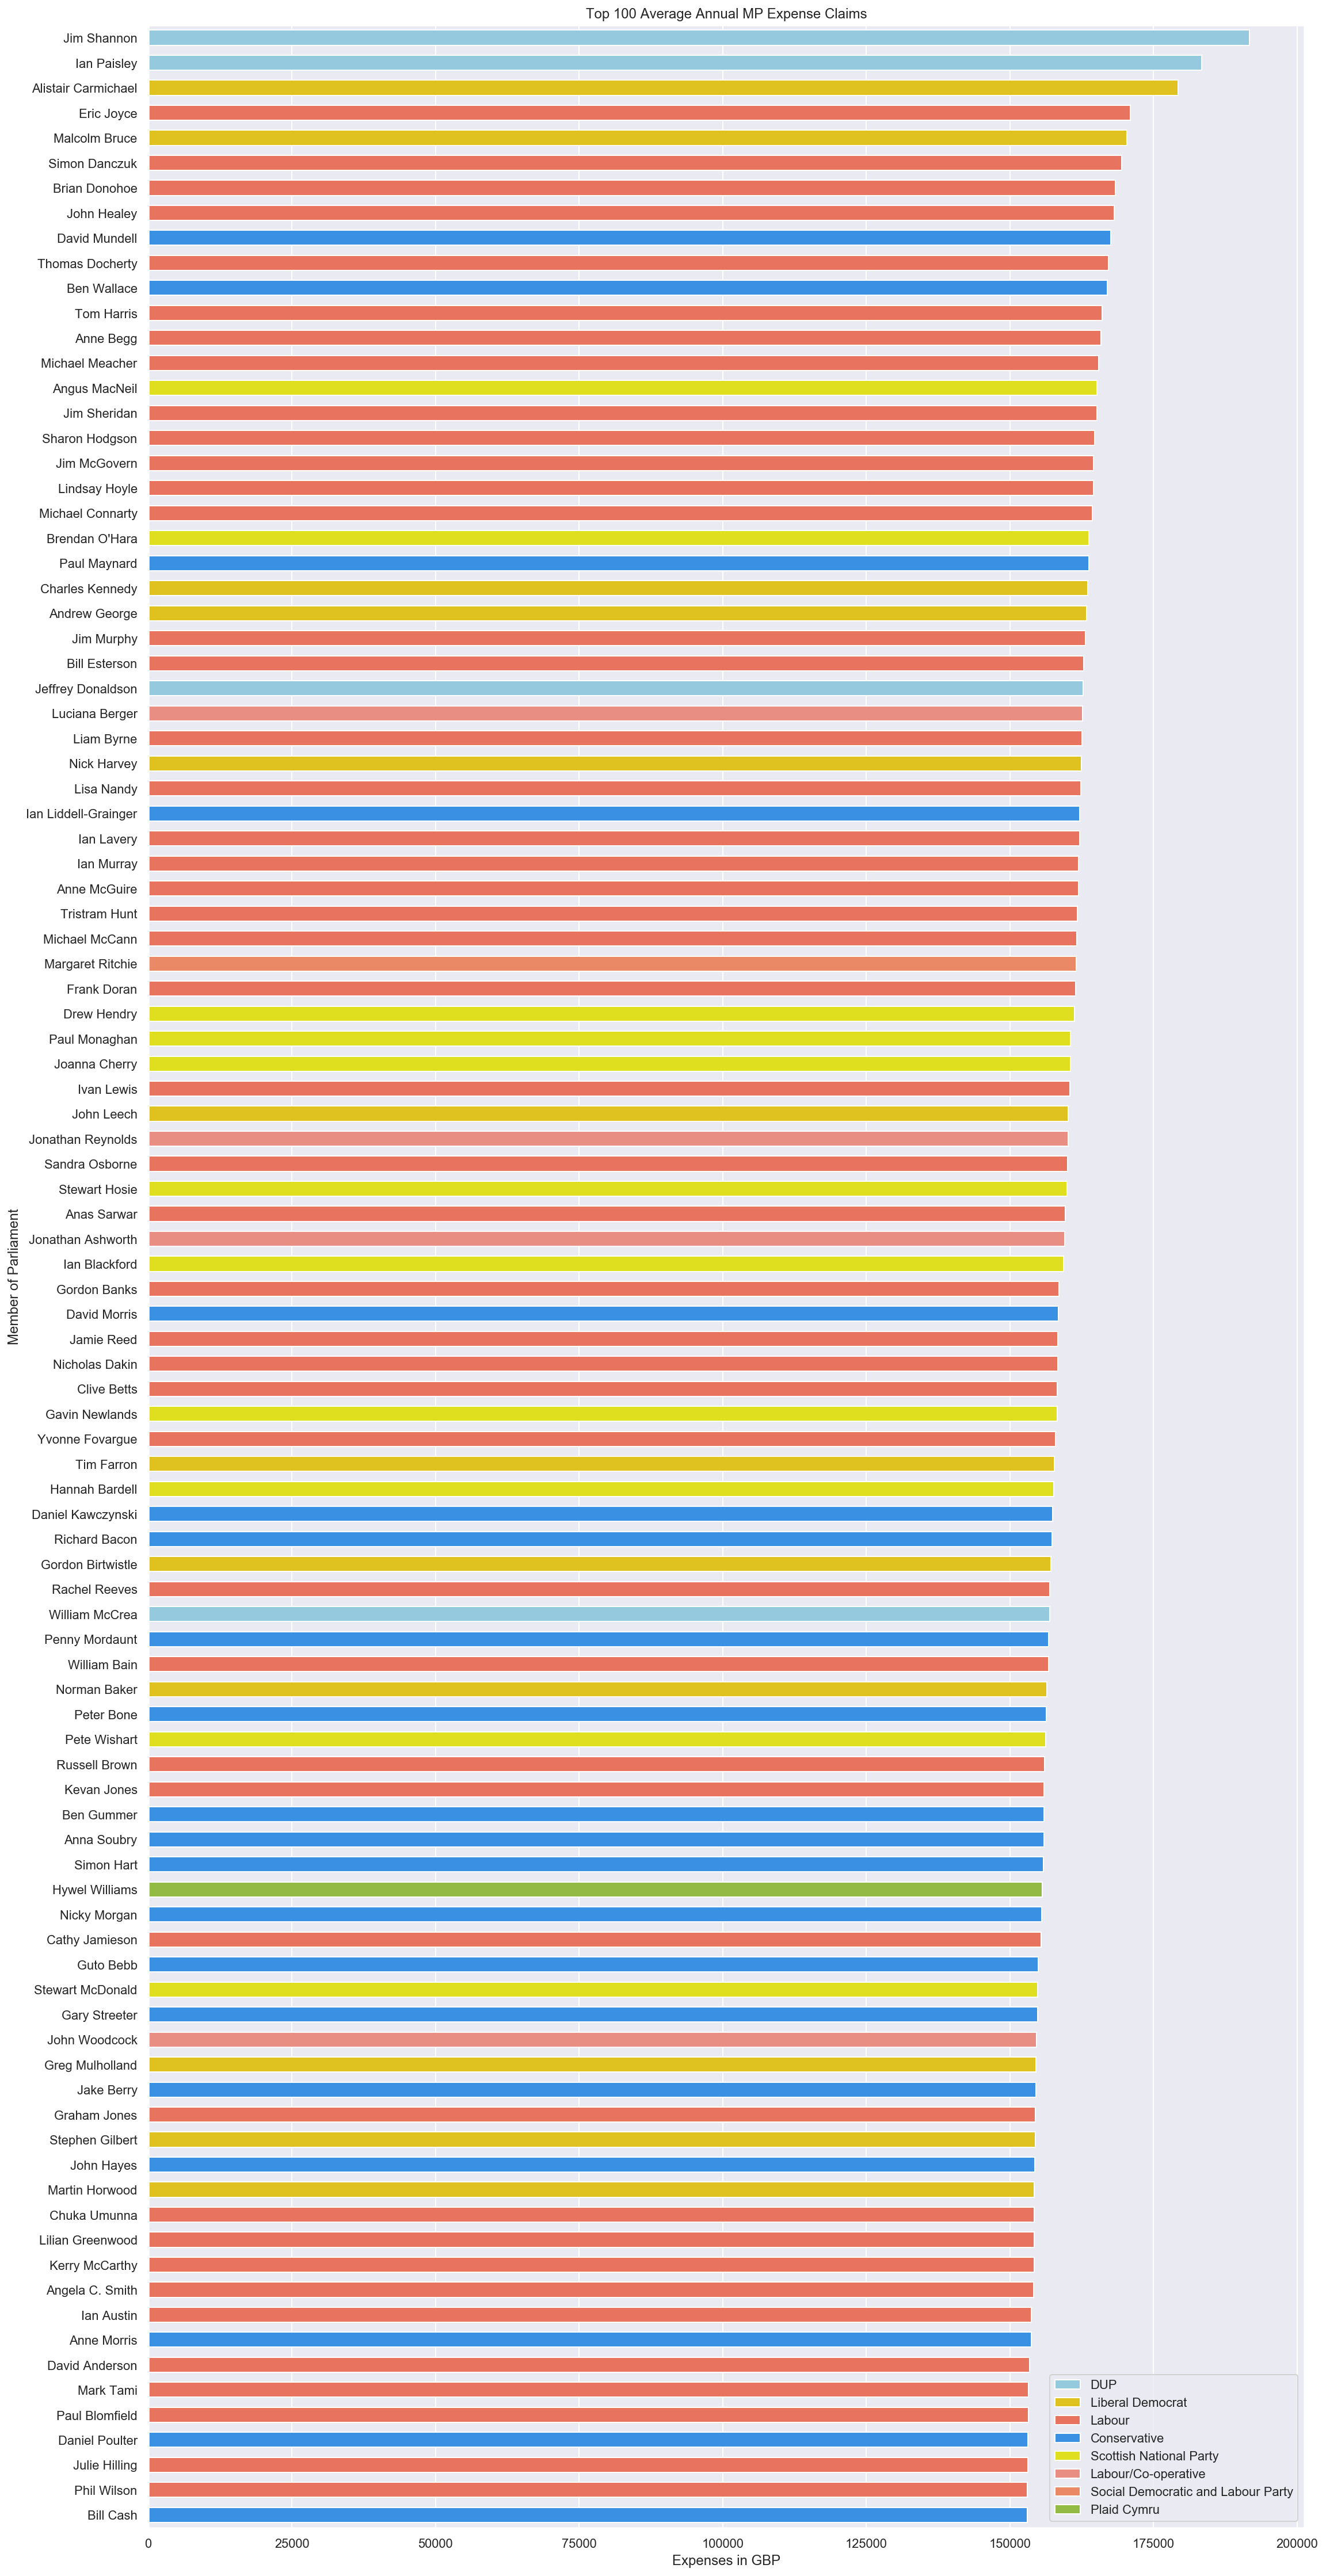

In [95]:
plt.figure(figsize=(18,40))
sns.set()
plt.title('Top 100 Average Annual MP Expense Claims')
ax = sns.barplot(data=sorted_averages.head(100), 
                 x='amount_claimed', 
                 y='name', 
                 hue='party', 
                 palette=party_colours, 
                 dodge=False)
# note uneven bars is a known bug when you turn on the hue parameter but for some reason dodge=False fixes it!
plt.legend(loc='lower right')
change_width(ax, .6)

ax.set(xlabel='Expenses in GBP', ylabel='Member of Parliament')
plt.show();

These top 3 all have constituencies very far from westminster -- perhaps it's travel costs, perhaps not... 